# **Praktikum 3 - Self-optimizing Map (SOM)**
### **Instalasi SOM**

In [1]:
pip install minisom

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11720 sha256=ddb0b6ad786b4a3d95eac8e8fa0619146b4ce606781c02d85c1ed4f540229c91
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\ec\7e\00\ac334ebb21e9016a73bef195e9732606217c6894f96bd51e6f
Successfully built minisom
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

In [4]:
# Normalisasi data
data = data / data.max(axis=0)

In [5]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)


In [6]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

In [7]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

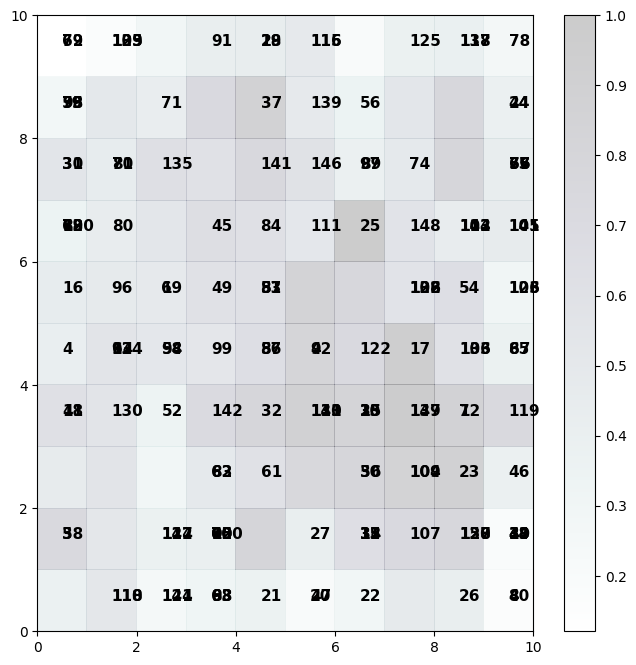

In [8]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()